# Floating Car Data Analytics and Visualization Study Project 

## Individual Assignment

#### Submitted by: Anu Bhalu Shrestha

### My Experience with envirocar-Py Notebook

This is my first time working with Jupyter Notebooks and I found it easy and interactive to use as well as easy to install with anaconda. As for the enviroCar-Py package, I had problems at the very beginning during installation. I could not install this package, geopandas and other dependencies even after trying for a long time. After some research, I found the solution in the form of virtual environments. I created a virtual enironment named "geo_env" and installed all the necessary packages and started working within that environment. Then I was able to run all the scripts in enviroCar-Py notebook.

After studying the scripts, I tried to familiarize myself with the data structure of tracks which comes as GeoDataFrame. I made some changes to the codes changing the bounding box area, adding summary statistics and a scatterplot of speed and co2 values for a selected track. I am still studying the packages imported such as geopandas, folium, pydeck and seaborn to get a better understanding of the enviroCar project. This assignment helped me get used to the python environment which I am studying after a long gap. When I create a pdf from this notebook, the pydeck visualization map looks cropped so I have added a screenshot of this at the end of the notebook.

Following is the finalized notebook after I applied the changes.


# Package loading and basic configurations

In [3]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import seaborn as sns

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) (now changed to Dusseldorf) and requests 50 (now changed to 20) tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [4]:
#bbox channged to Dusseldorf
bbox = BboxSelector([
    6.7559051513671875, # min_x
    51.21226046094158, # min_y
    6.792297363281249, # max_x
    51.22817289705297  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=20) # requesting 20 tracks inside the bbox
track_df

,id,time,geometry,GPS VDOP.value,GPS VDOP.unit,Intake Temperature.value,Intake Temperature.unit,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,GPS PDOP.value,...,track.end,sensor.type,sensor.engineDisplacement,sensor.model,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,track.appVersion,track.touVersion
0,5a9bad3844ea851012e06c09,2018-02-24T16:21:20,POINT (6.77675 51.22546),1.722027,precision,32.999999,c,2.774379,V,2.022027,...,2018-02-24T16:44:46Z,car,1800,Avensis,574e78cbe4b09078f97bbb4a,gasoline,2011,Toyota,NaN,NaN
1,5a9bad3844ea851012e06c0b,2018-02-24T16:21:25,POINT (6.77668 51.22518),2.919473,precision,32.000000,c,4.589390,V,3.281339,...,2018-02-24T16:44:46Z,car,1800,Avensis,574e78cbe4b09078f97bbb4a,gasoline,2011,Toyota,NaN,NaN
2,5a9bad3844ea851012e06c0c,2018-02-24T16:21:30,POINT (6.77635 51.22497),1.700000,precision,34.227160,c,3.118953,V,2.157822,...,2018-02-24T16:44:46Z,car,1800,Avensis,574e78cbe4b09078f97bbb4a,gasoline,2011,Toyota,NaN,NaN
3,5a9bad3844ea851012e06c0d,2018-02-24T16:21:35,POINT (6.77594 51.22484),1.951852,precision,32.000000,c,3.282321,V,2.351852,...,2018-02-24T16:44:46Z,car,1800,Avensis,574e78cbe4b09078f97bbb4a,gasoline,2011,Toyota,NaN,NaN
4,5a9bad3844ea851012e06c0e,2018-02-24T16:21:40,POINT (6.77566 51.22471),1.905823,precision,32.397662,c,3.358742,V,2.188153,...,2018-02-24T16:44:46Z,car,1800,Avensis,574e78cbe4b09078f97bbb4a,gasoline,2011,Toyota,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,57a35e90e4b086b281cf6bd8,2016-08-04T15:24:17,POINT (6.46094 51.22493),1.738716,precision,26.000000,c,NaN,NaN,2.111836,...,2016-08-04T15:24:37Z,car,1400,Corsa D,578c86a7e4b086b281ada0d0,gasoline,2013,Opel,NaN,NaN
374,57a35e90e4b086b281cf6bd9,2016-08-04T15:24:22,POINT (6.46095 51.22494),1.900000,precision,27.000000,c,NaN,NaN,2.327154,...,2016-08-04T15:24:37Z,car,1400,Corsa D,578c86a7e4b086b281ada0d0,gasoline,2013,Opel,NaN,NaN
375,57a35e90e4b086b281cf6bda,2016-08-04T15:24:27,POINT (6.46095 51.22494),1.827628,precision,28.000000,c,NaN,NaN,2.198899,...,2016-08-04T15:24:37Z,car,1400,Corsa D,578c86a7e4b086b281ada0d0,gasoline,2013,Opel,NaN,NaN
376,57a35e90e4b086b281cf6bdb,2016-08-04T15:24:32,POINT (6.46097 51.22496),1.900000,precision,29.000000,c,NaN,NaN,2.368122,...,2016-08-04T15:24:37Z,car,1400,Corsa D,578c86a7e4b086b281ada0d0,gasoline,2013,Opel,NaN,NaN


In [31]:
# Printing the column names in track_df geodataframe
for col in track_df.columns:
    print(col)

id
time
geometry
GPS VDOP.value
GPS VDOP.unit
Intake Temperature.value
Intake Temperature.unit
O2 Lambda Voltage.value
O2 Lambda Voltage.unit
GPS PDOP.value
GPS PDOP.unit
Consumption.value
Consumption.unit
Throttle Position.value
Throttle Position.unit
O2 Lambda Voltage ER.value
O2 Lambda Voltage ER.unit
Intake Pressure.value
Intake Pressure.unit
GPS Accuracy.value
GPS Accuracy.unit
Engine Load.value
Engine Load.unit
GPS Altitude.value
GPS Altitude.unit
GPS HDOP.value
GPS HDOP.unit
Rpm.value
Rpm.unit
GPS Speed.value
GPS Speed.unit
Speed.value
Speed.unit
MAF.value
MAF.unit
GPS Bearing.value
GPS Bearing.unit
CO2.value
CO2.unit
track.id
track.length
track.begin
track.end
sensor.type
sensor.engineDisplacement
sensor.model
sensor.id
sensor.fuelType
sensor.constructionYear
sensor.manufacturer
track.appVersion
track.touVersion
Calculated MAF.value
Calculated MAF.unit


In [119]:
len(track_df.groupby('track.id'))

20

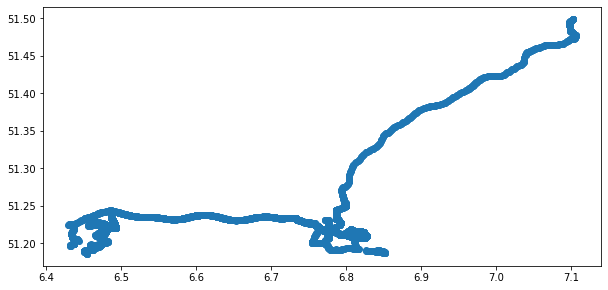

In [5]:
track_df.plot(figsize=(10, 10))

# Inspecting a single Track

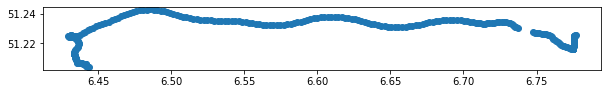

In [6]:
some_track_id = track_df['track.id'].unique()[0]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot(figsize=(10,10))

In [7]:
some_track = some_track[some_track['Speed.value'].notna()]

In [8]:
# summary statistics of speed value for the selected track
some_track['Speed.value'].describe()

count    275.000000
mean      77.515545
std       43.094688
min        0.000000
25%       38.954023
50%       77.999998
75%      121.000000
max      132.999996
Name: Speed.value, dtype: float64

In [9]:
# summary statistics of co2 value for the selected track
some_track['CO2.value'].describe()

count    275.000000
mean      12.655975
std        8.070626
min        1.506369
25%        4.919652
50%       12.343069
75%       19.617727
max       31.688137
Name: CO2.value, dtype: float64

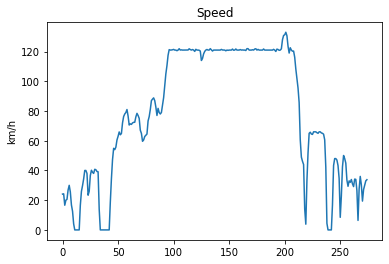

In [10]:
ax = some_track['Speed.value'].plot()
ax.set_title("Speed")
ax.set_ylabel(some_track['Speed.unit'][0])
ax

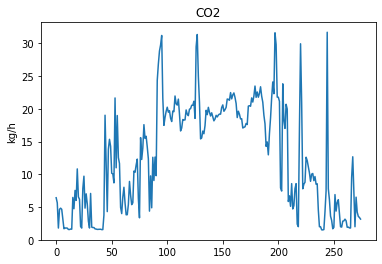

In [11]:
ay = some_track['CO2.value'].plot()
ay.set_title("CO2")
ay.set_ylabel(some_track['CO2.unit'][0])
ay

### Scatterplot
Using a function from the seaborn package to create a scatter plot of Speed and CO2 value for the chosen track.

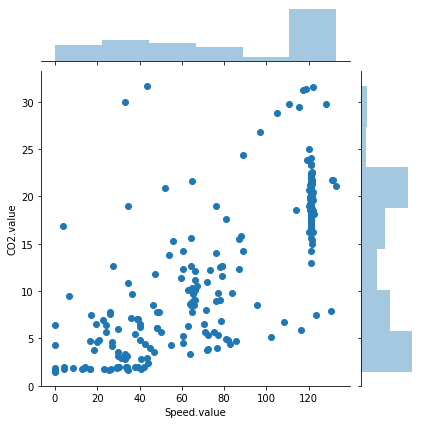

In [12]:
sns.jointplot(y='CO2.value', x='Speed.value', data=some_track);


## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [13]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [18]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=6.7559051513671875, #changed to min lat and lon of bbox
    latitude=51.21226046094158,
    zoom=12,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state, mapbox_key='pk.eyJ1IjoiYW51c2hyZXN0aGE4MyIsImEiOiJjazh6cmYyenowZTJvM25wcmdma3YwamNxIn0.Hr0pkYHkHlCdgf-FmZTjbw'
)
r.to_html('tracks_dusseldorf.html', iframe_width=900)

'C:\\Users\\shres\\OneDrive - Universitat Jaume I\\II_sem\\Floating car project\\envirocar-py\\examples\\tracks_dusseldorf.html'

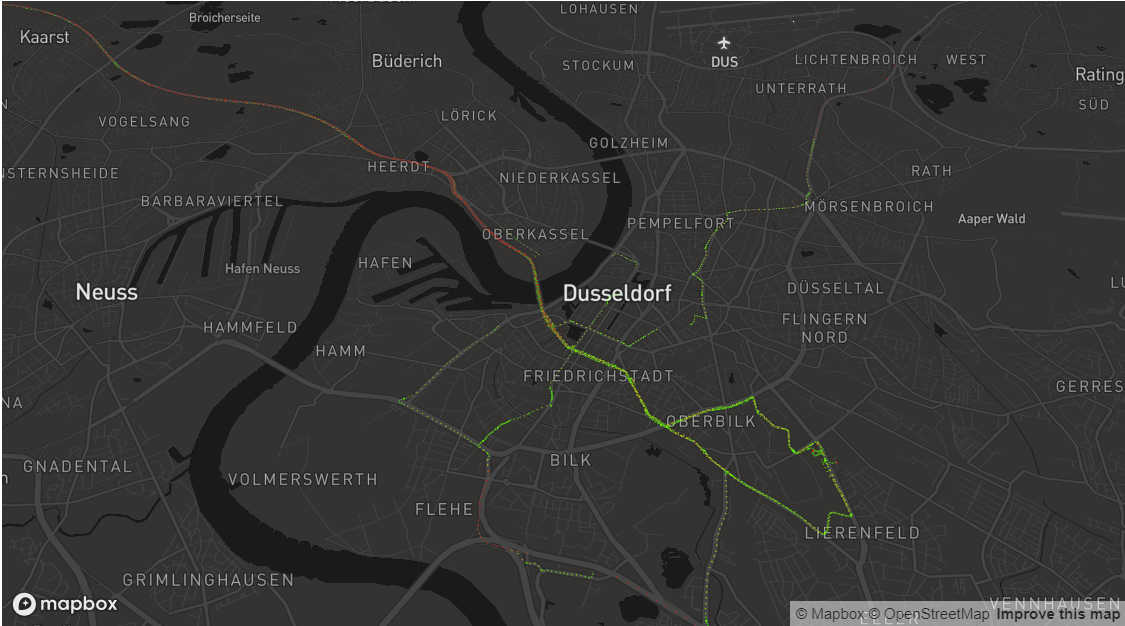